In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [10]:
%matplotlib inline

In [15]:
df=pd.read_csv('/content/ADANIPORTS.NS.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/ADANIPORTS.NS.csv'

In [12]:
df.head()

NameError: name 'df' is not defined

In [13]:


df.columns

NameError: name 'df' is not defined

In [14]:
df.isnull().sum()

NameError: name 'df' is not defined

In [4]:
import missingno as msno
msno.matrix(df)
plt.xlabel('Missing value marks')
plt.ylabel('Count')

ModuleNotFoundError: No module named 'missingno'

In [5]:
df.info()

NameError: name 'df' is not defined

In [51]:
stockprice_one_year=df[(df['Date']>'2011-03-31')&(df['Date']<'2012-04-01')]
stockprice_one_year

,Date,Open,High,Low,Close,Adj Close,Volume
825,2011-04-01,138.000000,142.250000,137.500000,141.149994,133.361420,1716486.0
826,2011-04-04,142.350006,149.100006,141.500000,148.199997,140.022369,1125553.0
827,2011-04-05,148.500000,158.000000,148.050003,156.850006,148.195068,1712167.0
828,2011-04-06,158.000000,158.399994,152.250000,153.649994,145.171646,934007.0
829,2011-04-07,154.750000,157.000000,152.699997,155.750000,147.155762,1042870.0
...,...,...,...,...,...,...,...
1068,2012-03-26,123.000000,123.699997,119.050003,120.550003,114.481506,1124699.0
1069,2012-03-27,121.550003,123.000000,118.250000,121.500000,115.383698,1098462.0
1070,2012-03-28,121.500000,121.500000,117.000000,118.250000,112.297295,1756343.0
1071,2012-03-29,118.000000,125.500000,116.099998,124.199997,117.947777,2869127.0


In [52]:
stockprice_one_year.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [53]:
stockprice_one_year.describe

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
825   2011-04-01  138.000000  142.250000  137.500000  141.149994  133.361420   
826   2011-04-04  142.350006  149.100006  141.500000  148.199997  140.022369   
827   2011-04-05  148.500000  158.000000  148.050003  156.850006  148.195068   
828   2011-04-06  158.000000  158.399994  152.250000  153.649994  145.171646   
829   2011-04-07  154.750000  157.000000  152.699997  155.750000  147.155762   
...          ...         ...         ...         ...         ...         ...   
1068  2012-03-26  123.000000  123.699997  119.050003  120.550003  114.481506   
1069  2012-03-27  121.550003  123.000000  118.250000  121.500000  115.383698   
1070  2012-03-28  121.500000  121.500000  117.000000  118.250000  112.297295   
1071  2012-03-29  118.000000  125.500000  116.099998  124.199997  117.947777   
1072  2012-03-30  124.500000  130.000000  124.099998  129.500000  122.980972   

     

<Axes: >

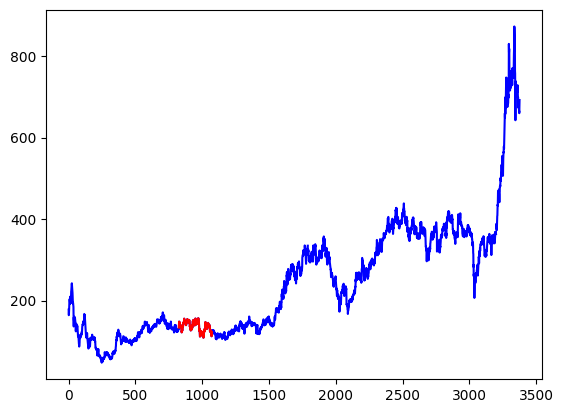

In [54]:
pl = df['Adj Close'].plot(c='blue')
stockprice_one_year['Adj Close'].plot(ax=pl,c='red')

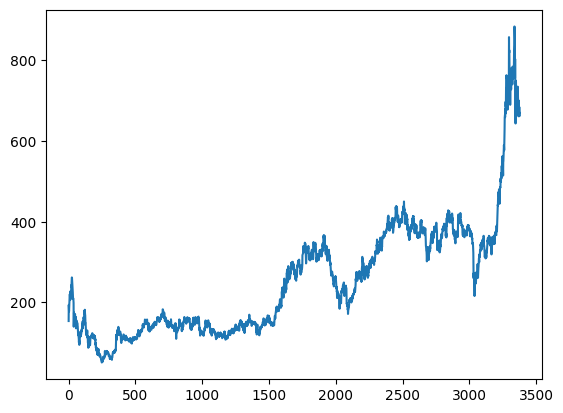

In [55]:
plt.plot(df['Open'])

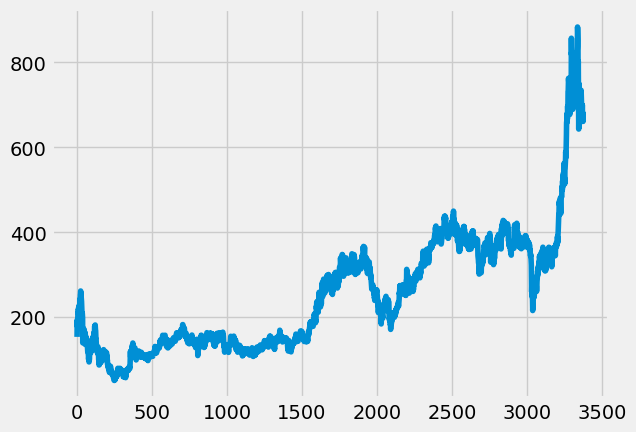

In [56]:
plt.style.use('fivethirtyeight')
plt.plot(df['Open'])

In [57]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999382,0.999323,0.998876,0.998755,0.495452
High,0.999382,1.000000,0.999059,0.999544,0.999424,0.509711
Low,0.999323,0.999059,1.000000,0.999388,0.999244,0.485848
Close,0.998876,0.999544,0.999388,1.000000,0.999863,0.500124
Adj Close,0.998755,0.999424,0.999244,0.999863,1.000000,0.501529
Volume,0.495452,0.509711,0.485848,0.500124,0.501529,1.000000


<Axes: >

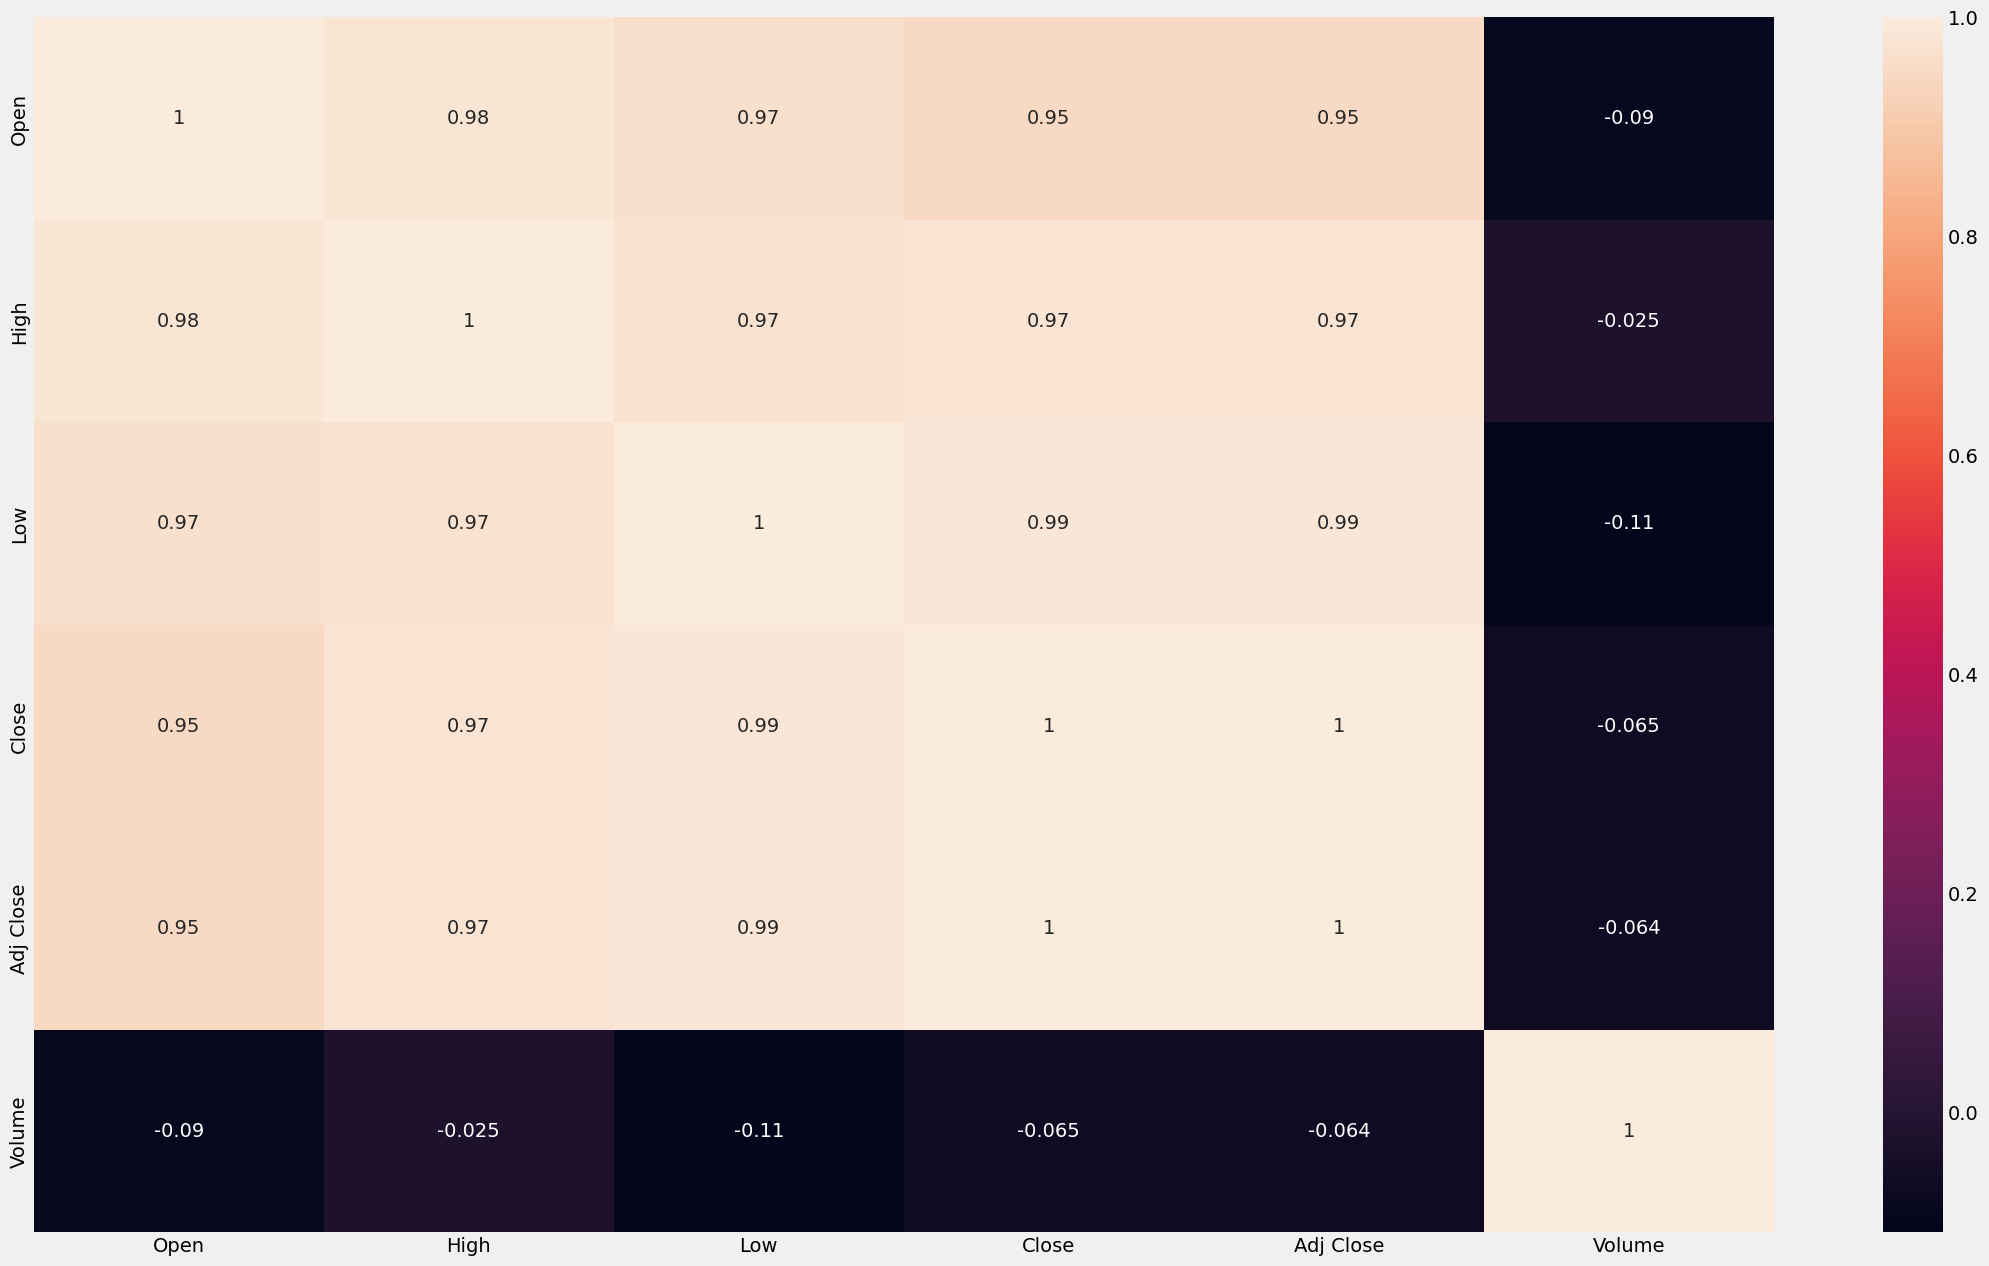

In [59]:
plt.figure(figsize=(25,15))
sns.heatmap(stockprice_one_year.corr(method='pearson'),annot=True)

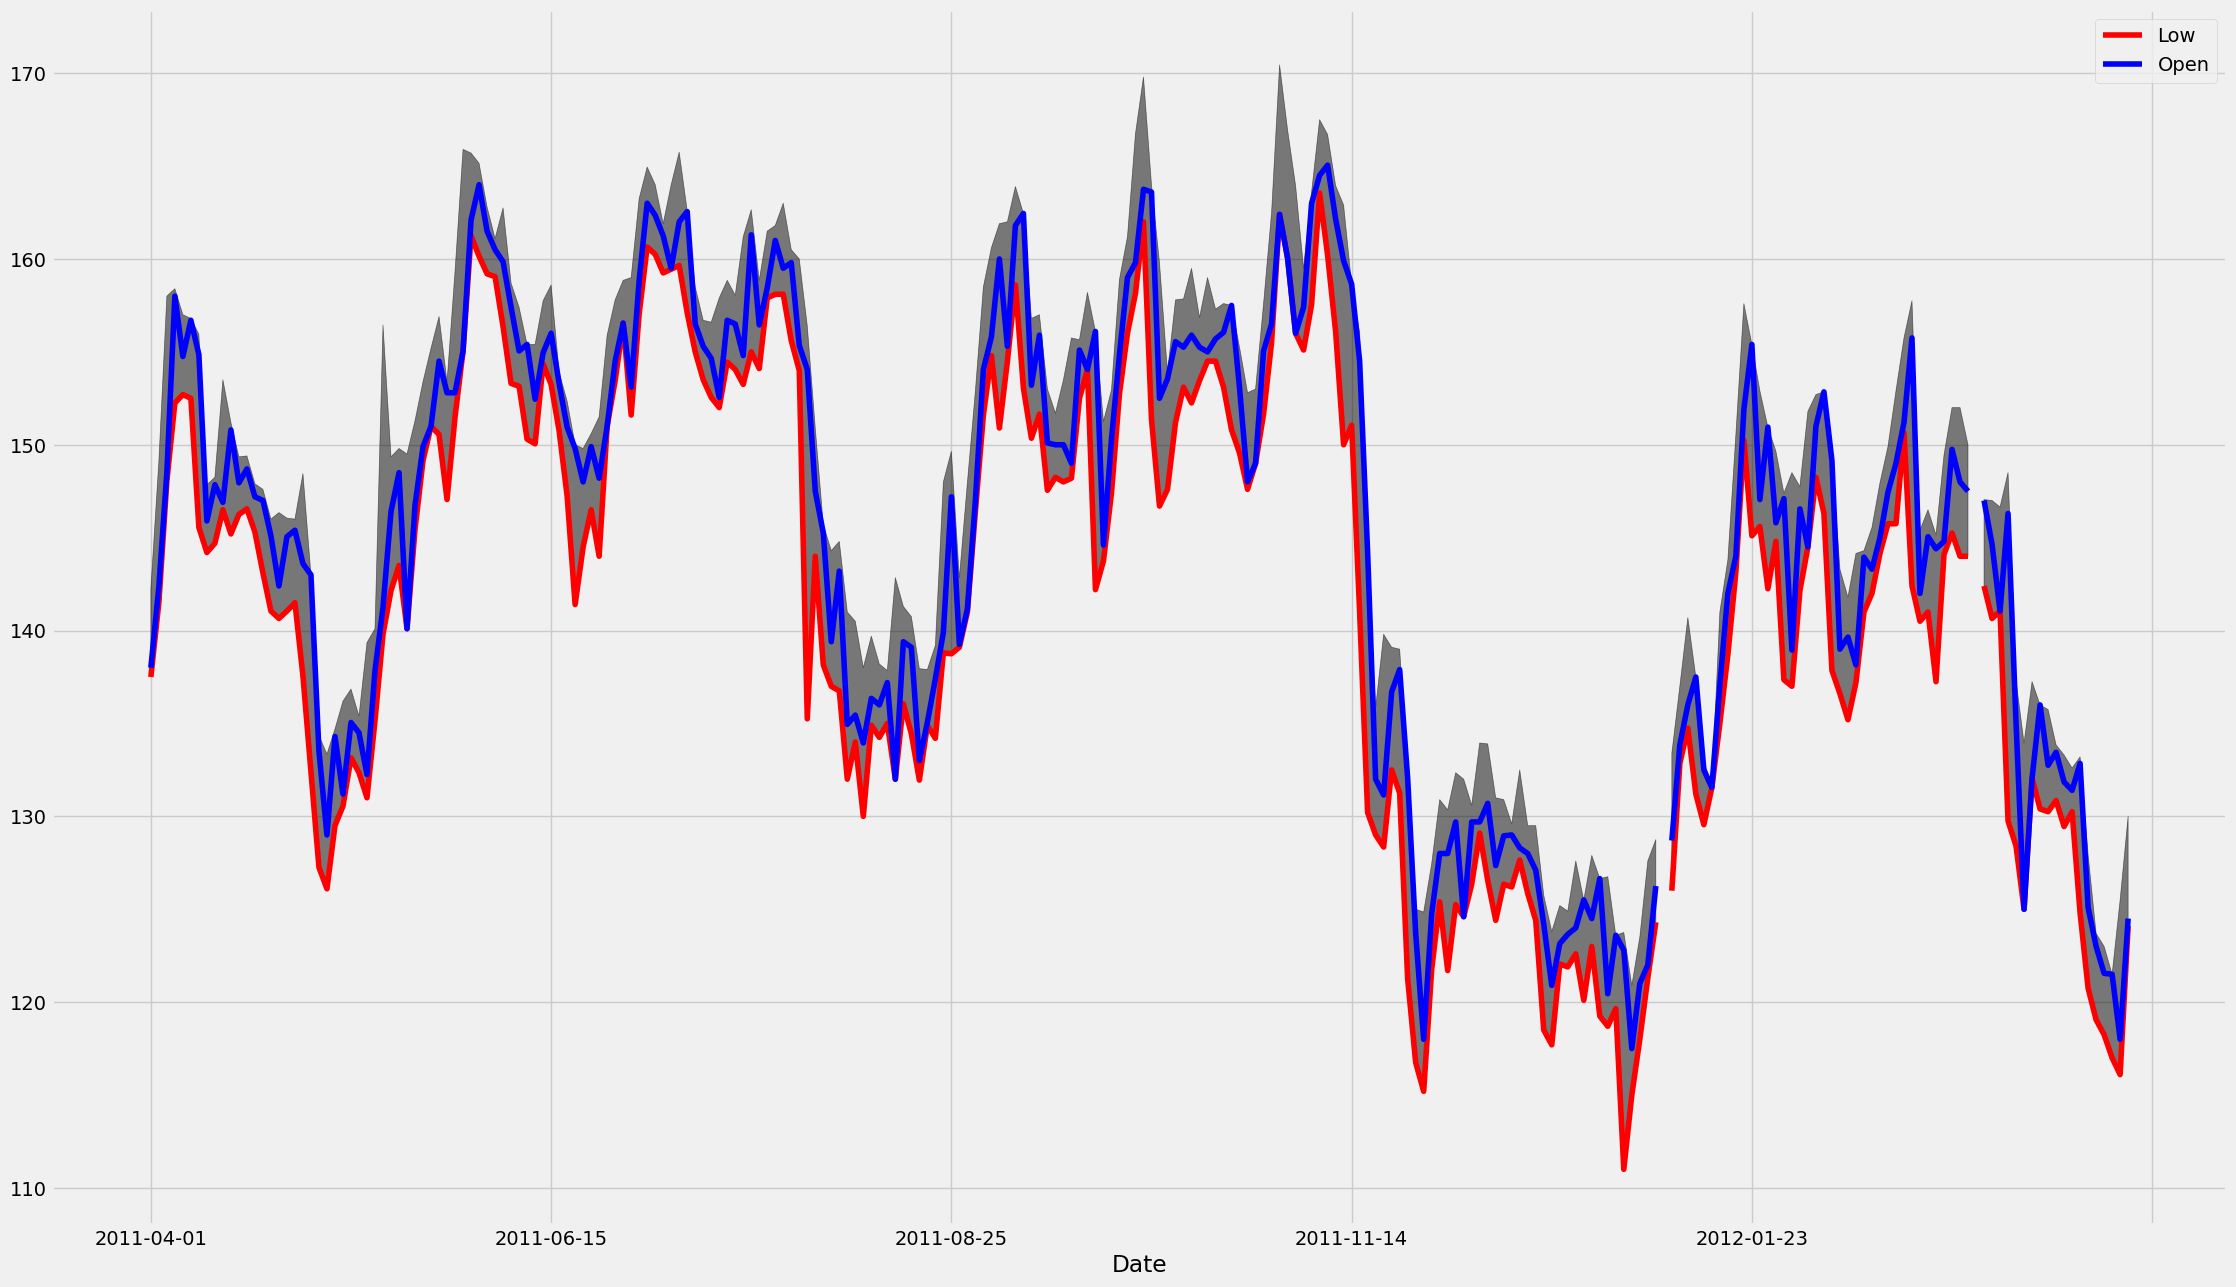

In [63]:
stockprice_one_year.plot(x='Date',y=['Low','Open'],color=['r','b'],figsize=[25,15])
plt.fill_between(stockprice_one_year['Date'],stockprice_one_year['Low'],stockprice_one_year['High'],color='k',alpha=0.5)
plt.show()

In [71]:
data=df[['Date','Open','High','Low','Volume']]

In [72]:
df.set_index('Date',drop=False,inplace=True)

In [73]:
df.fillna(df.mean(),inplace=True)

<Axes: xlabel='Date'>

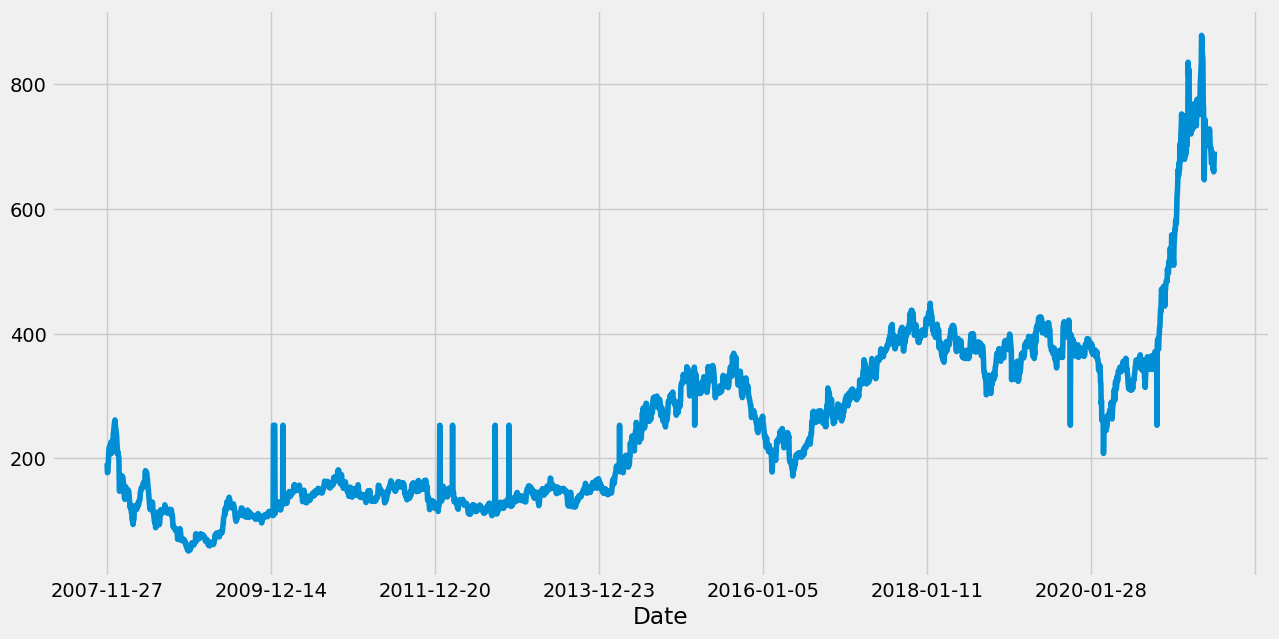

In [74]:
df.Close.plot(figsize=(14,7))

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3376 non-null   object 
 1   Open    3362 non-null   float64
 2   High    3362 non-null   float64
 3   Low     3362 non-null   float64
 4   Volume  3362 non-null   float64
dtypes: float64(4), object(1)
memory usage: 132.0+ KB


In [80]:
df.reset_index(drop=True, inplace=True)
lag_features =['Open','High','Low','Volume']
window1=3
window2=7

df_rolled_3d = df[lag_features].rolling(window=window1,min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window=window2,min_periods=0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
  df[f"{feature}_mean_lag{window1}"]=df_mean_3d[feature].astype('float32')
  df[f"{feature}_std_lag{window2}"]=df_std_7d[feature].astype('float32')

In [81]:
df.fillna(df.mean(),inplace=True)

In [82]:
df.set_index("Date",drop=False,inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,Volume_mean_lag3,Volume_std_lag7
Date,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,154.000000,207.000000,154.000000,191.800003,177.675140,27262365.0,253.110962,7.356249,257.500549,6.945182,248.268311,7.171177,3679219.5,1870217.00
2007-11-28,2007-11-28,194.000000,197.800003,174.929993,177.000000,163.965057,21958915.0,154.000000,7.356249,207.000000,6.945182,154.000000,7.171177,27262364.0,1870217.00
2007-11-29,2007-11-29,181.000000,182.800003,168.460007,177.399994,164.335602,25616715.0,174.000000,28.284271,202.399994,6.505380,164.464996,14.799740,24610640.0,3750105.50
2007-11-30,2007-11-30,178.000000,191.399994,178.000000,185.800003,172.117004,23047035.0,176.333328,20.404247,195.866669,12.215290,165.796661,10.716165,24945998.0,2714597.75
2007-12-03,2007-12-03,187.949997,198.860001,184.399994,196.000000,181.565826,14578850.0,184.333328,16.680828,190.666672,10.220731,173.796661,10.667136,23540888.0,2411267.25


In [85]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"]=df.Date.dt.month
df["day"]=df.Date.dt.day
df["day_of_week"]=df.Date.dt.dayofweek
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,Volume_mean_lag3,Volume_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,154.000000,207.000000,154.000000,191.800003,177.675140,27262365.0,253.110962,7.356249,257.500549,6.945182,248.268311,7.171177,3679219.5,1870217.00,11,27,1
2007-11-28,2007-11-28,194.000000,197.800003,174.929993,177.000000,163.965057,21958915.0,154.000000,7.356249,207.000000,6.945182,154.000000,7.171177,27262364.0,1870217.00,11,28,2
2007-11-29,2007-11-29,181.000000,182.800003,168.460007,177.399994,164.335602,25616715.0,174.000000,28.284271,202.399994,6.505380,164.464996,14.799740,24610640.0,3750105.50,11,29,3
2007-11-30,2007-11-30,178.000000,191.399994,178.000000,185.800003,172.117004,23047035.0,176.333328,20.404247,195.866669,12.215290,165.796661,10.716165,24945998.0,2714597.75,11,30,4
2007-12-03,2007-12-03,187.949997,198.860001,184.399994,196.000000,181.565826,14578850.0,184.333328,16.680828,190.666672,10.220731,173.796661,10.667136,23540888.0,2411267.25,12,3,0


In [86]:
df_train = df[df.Date<"2018"]
df_valid = df[df.Date >= "2018"]

In [87]:
df_valid.shape

(884, 18)

In [88]:
!pip install keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
df_train.head().T

Date,2007-11-27,2007-11-28,2007-11-29,2007-11-30,2007-12-03
Date,2007-11-27 00:00:00,2007-11-28 00:00:00,2007-11-29 00:00:00,2007-11-30 00:00:00,2007-12-03 00:00:00
Open,154.0,194.0,181.0,178.0,187.949997
High,207.0,197.800003,182.800003,191.399994,198.860001
Low,154.0,174.929993,168.460007,178.0,184.399994
Close,191.800003,177.0,177.399994,185.800003,196.0
Adj Close,177.67514,163.965057,164.335602,172.117004,181.565826
Volume,27262365.0,21958915.0,25616715.0,23047035.0,14578850.0
Open_mean_lag3,253.110962,154.0,174.0,176.333328,184.333328
Open_std_lag7,7.356249,7.356249,28.284271,20.404247,16.680828
High_mean_lag3,257.500549,207.0,202.399994,195.866669,190.666672


In [90]:
y_train = df_train["Close"]
scaler=MinMaxScaler(feature_range=(0,1))
y_train1=scaler.fit_transform(np.array(df_train["Close"]).reshape(-1,1))
y_trainn = df_train["Close"].to_numpy().reshape(-1,1)

In [91]:
y_valid = df_valid["Close"]
scaler=MinMaxScaler(feature_range=(0,1))
y_valid1=scaler.fit_transform(np.array(df_valid["Close"]).reshape(-1,1))
y_validn = df_train["Close"].to_numpy().reshape(-1,1)

In [92]:
X_train = df_train.drop(columns=['Close'])
X_train1 = X_train.drop('Date',axis=1)
X_train1 = (X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_train2 = pd.concat((X_train1,X_train.Date),1)

In [93]:
X_valid = df_valid.drop(columns=['Close'])
X_valid1 = X_valid.drop('Date',axis=1)
X_valid1 = (X_valid1-X_valid1.min())/(X_valid1.max()-X_valid1.min())
X_valid2 = pd.concat((X_valid1,X_valid.Date),1)

In [94]:
X_train3 = X_train2.drop(columns=["Date"]).to_numpy()
X_valid3 = X_valid2.drop(columns=["Date"]).to_numpy()

In [95]:
y_train1 = y_train1.reshape(-1,1)
y_valid1 = y_valid1.reshape(-1,1)

In [96]:
!pip install xgboost
import xgboost as xgb
import sklearn 
from xgboost import XGBRegressor
from xgboost import plot_importance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
xgb= XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

xgb.fit(X_train3,y_train1, eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True)

[0]	validation_0-rmse:0.26527	validation_1-rmse:0.26430
[1]	validation_0-rmse:0.26265	validation_1-rmse:0.26165
[2]	validation_0-rmse:0.26004	validation_1-rmse:0.25903
[3]	validation_0-rmse:0.25747	validation_1-rmse:0.25645
[4]	validation_0-rmse:0.25492	validation_1-rmse:0.25389
[5]	validation_0-rmse:0.25239	validation_1-rmse:0.25136
[6]	validation_0-rmse:0.24989	validation_1-rmse:0.24885
[7]	validation_0-rmse:0.24742	validation_1-rmse:0.24636
[8]	validation_0-rmse:0.24497	validation_1-rmse:0.24391
[9]	validation_0-rmse:0.24254	validation_1-rmse:0.24148
[10]	validation_0-rmse:0.24014	validation_1-rmse:0.23908
[11]	validation_0-rmse:0.23776	validation_1-rmse:0.23669
[12]	validation_0-rmse:0.23540	validation_1-rmse:0.23433
[13]	validation_0-rmse:0.23307	validation_1-rmse:0.23197
[14]	validation_0-rmse:0.23076	validation_1-rmse:0.22967
[15]	validation_0-rmse:0.22848	validation_1-rmse:0.22736
[16]	validation_0-rmse:0.22622	validation_1-rmse:0.22508
[17]	validation_0-rmse:0.22398	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1200x800 with 0 Axes>

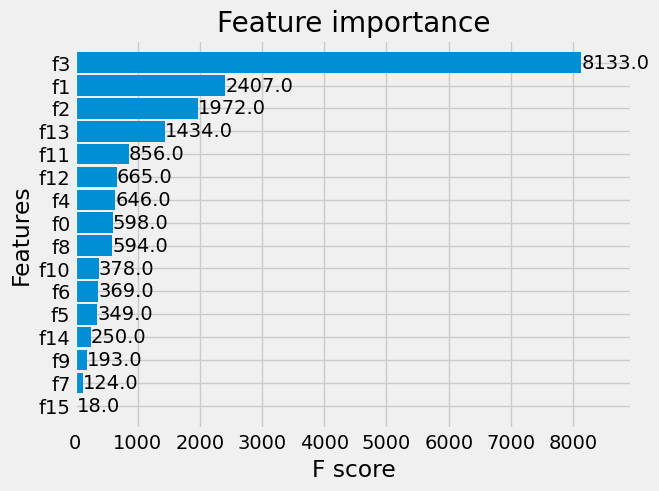

In [98]:
plt.figure(figsize=(12,8))
feature_importance = plot_importance(xgb,height=0.9)
feature_importance

In [104]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v=predicted_results_v.reshape(-1,1)
predicted_results_t = predicted_results_t.reshape(-1,1)
predicted_results_v= scaler.inverse_transform(predicted_results_v)
predicted_results_t= scaler.inverse_transform(predicted_results_t)

ValueError: ignored

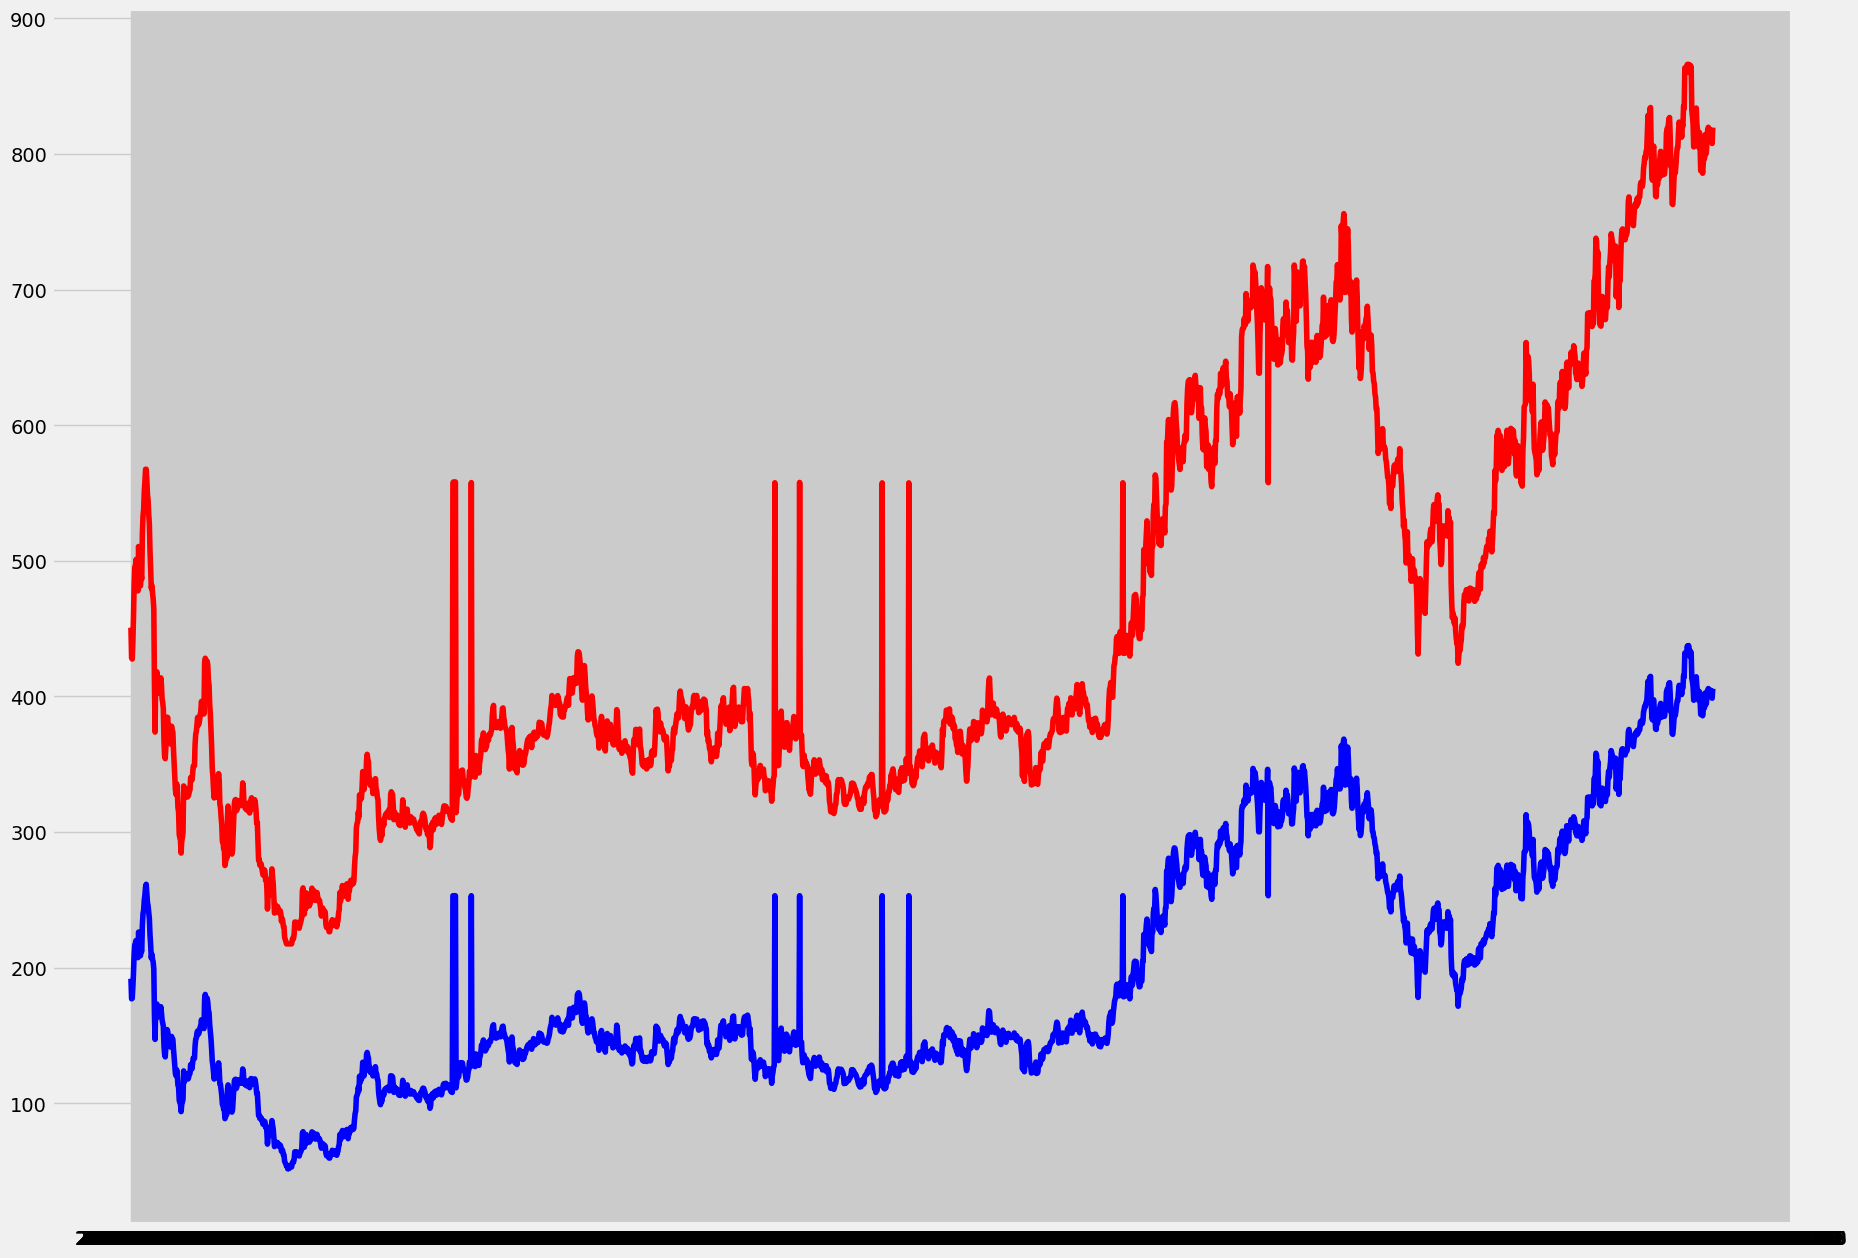

In [107]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train ",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train ", color='r')
plt.plot(X_valid2.index,list(y_validn),label=" actual Price valid", color = 'm')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid", color='g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()